In [4]:
import sys
sys.path.append("../src/")
from data import train_and_testloader_from_pc, dataloader_from_pc
from model import AEDist
import numpy as np
import torch
import phate
from heatgeo.embedding import HeatGeo
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping
from scipy.spatial import procrustes
import scanpy as sc
import scprep
import matplotlib.pyplot as plt
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import ModelCheckpoint
import wandb
import hydra
import os
from omegaconf import DictConfig, OmegaConf
import wandb

In [5]:
adata = sc.read('../data/eb_hv.h5ad', backed='r')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


(array([1141., 3504., 8806., 7415., 5176., 3144., 2101.,  952.,  608.,
         795.]),
 array([-2.96957282e-02, -2.22740495e-02, -1.48523707e-02, -7.43069194e-03,
        -9.01317571e-06,  7.41266559e-03,  1.48343444e-02,  2.22560231e-02,
         2.96777019e-02,  3.70993807e-02,  4.45210594e-02]),
 <BarContainer object of 10 artists>)

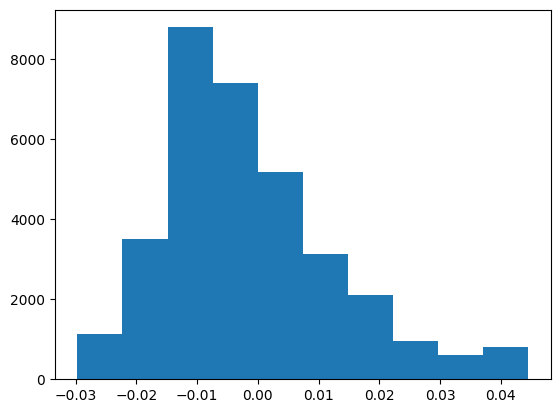

In [8]:
plt.hist(adata.obsm['X_phate'].flatten())

In [9]:
adata2 = sc.read('../data/sea_ad_merfish_used_in_analysis_subset12000.h5ad', backed='r')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


(array([2411., 3146., 5230., 2504., 4519., 2043., 1069., 1016., 1221.,
         841.]),
 array([-0.02270214, -0.01677104, -0.01083994, -0.00490884,  0.00102226,
         0.00695336,  0.01288446,  0.01881556,  0.02474666,  0.03067776,
         0.03660886]),
 <BarContainer object of 10 artists>)

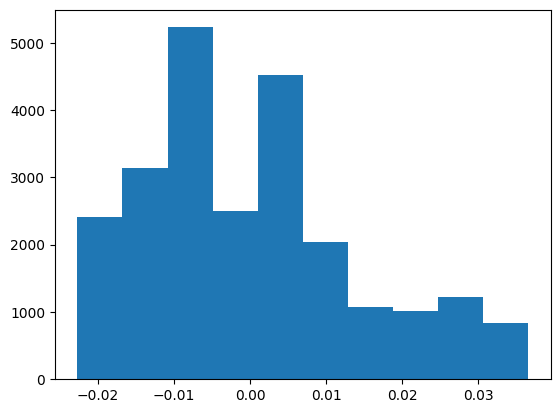

In [10]:
plt.hist(adata2.obsm['X_phate'].flatten())

In [11]:
adata3 = sc.read('../data/BMMC_myeloid.h5ad', backed='r')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


(array([  23.,  218., 2216., 2537.,  309.,   77.,   14.,   12.,   35.,
          19.]),
 array([-0.05191598, -0.03534723, -0.01877849, -0.00220974,  0.01435901,
         0.03092775,  0.0474965 ,  0.06406525,  0.08063399,  0.09720274,
         0.11377149]),
 <BarContainer object of 10 artists>)

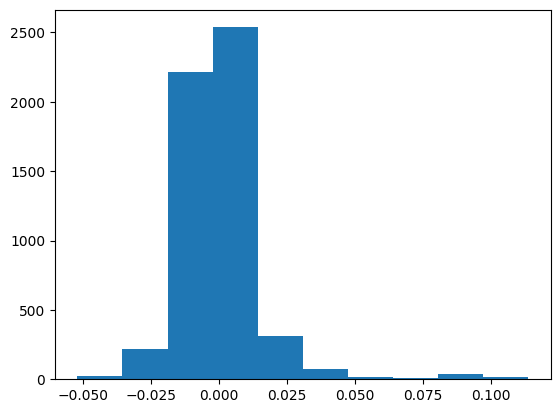

In [12]:
plt.hist(adata3.obsm['X_phate'].flatten())